In [1]:
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

<h1> Prepare Data </h1>

In [2]:
img_names = os.listdir("../weekly project 7/train")

In [ ]:
# While checking the data manually, I regconize that the image was named like "cat.01.jpg",
# So it suitable to write a function to split the "cat" and "dog" word out and making label from them.

In [3]:
img_dict= []
for img_name in img_names:
    name= img_name.split('.')[0]
    if name == 'dog':
        img_dict.append(1)
    else: img_dict.append(0)
df= pd.DataFrame({'Name': img_names,
                 'Category': img_dict})

<h3> Check if the split work </h3>

In [4]:
name= img_name.split('.')[0]
name

'dog'

<h3> Check the data </h3>

In [5]:
df.sample(10)

,Name,Category
5891,cat.405.jpg,0
7487,cat.5487.jpg,0
17127,dog.2912.jpg,1
8484,cat.6384.jpg,0
3487,cat.1887.jpg,0
15842,dog.1756.jpg,1
7712,cat.569.jpg,0
2374,cat.12133.jpg,0
21442,dog.6797.jpg,1
18206,dog.3884.jpg,1


<AxesSubplot:>

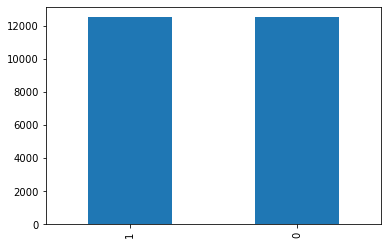

In [6]:
df['Category'].value_counts().plot.bar()

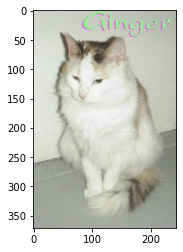

In [7]:
sample = random.choice(img_names)
image = load_img("../weekly project 7/train/"+sample)
plt.imshow(image)

In [8]:
df['Category'].replace({0: 'cat',
                       1: 'dog'}, inplace= True)

In [9]:
df.sample(10)

,Name,Category
18787,dog.4406.jpg,dog
18214,dog.3891.jpg,dog
11353,cat.8967.jpg,cat
1715,cat.11540.jpg,cat
11180,cat.8810.jpg,cat
13684,dog.11062.jpg,dog
16713,dog.254.jpg,dog
14650,dog.11932.jpg,dog
14462,dog.11763.jpg,dog
417,cat.10372.jpg,cat


<AxesSubplot:>

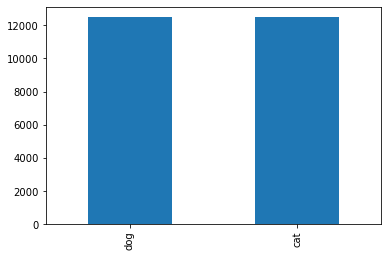

In [10]:
df['Category'].value_counts().plot.bar()

<h3> Split the set </h3>

In [11]:
train_set, val_set = train_test_split(df, test_size=0.20, random_state=42)

In [12]:
total_train= train_set.shape[0]

In [13]:
train_set['Category'].value_counts()

dog    10015
cat     9985
Name: Category, dtype: int64

In [14]:
val_total= val_set.shape[0]
val_total

5000

In [15]:
val_set['Category'].value_counts()

cat    2515
dog    2485
Name: Category, dtype: int64

In [16]:
val_set

,Name,Category
6868,cat.493.jpg,cat
24016,dog.9112.jpg,dog
9668,cat.745.jpg,cat
13640,dog.11022.jpg,dog
14018,dog.11363.jpg,dog
...,...,...
8670,cat.6551.jpg,cat
11839,cat.9403.jpg,cat
4013,cat.236.jpg,cat
21147,dog.6530.jpg,dog


<h3>ImageDataGenerator & Flow from dataframe</h3>

In [ ]:
# Image DataGenerator can generate batches of tensor image data with real-time data augmentation.
# But in this situation, I'm only using it to rescale image

In [36]:
train_datagen= ImageDataGenerator(rescale= 1./255)

In [28]:
# Binary because of 2 classes, "cat" and "dog"

In [ ]:
# Most of the Image datasets has 2 common formats:
# The first common format contains all the images within separate folders named after their respective class names.
# Therefore we can use flow_from_directory function to easily the images read from the disc and perform powerful on the fly image augmentation with the ImageDataGenerator.
# flow_from_dataframe allows you to input a Pandas dataframe which contains the filenames(with or without the extensions) column and a column which has the class names and directly read the images from the directory with their respective class names mapped

In [37]:
train_gen= train_datagen.flow_from_dataframe(train_set,
                                             "../weekly project 7/train/",
                                            x_col='Name',
                                            y_col='Category',
                                            target_size= (192,192),
                                            class_mode="binary",
                                            batch_size= 32,
                                            seed= 42
                                            )

Found 20000 validated image filenames belonging to 2 classes.


In [38]:
val_datagen= ImageDataGenerator(rescale= 1./255)

In [40]:
val_gen= val_datagen.flow_from_dataframe(val_set,
                                         "../weekly project 7/train/",
                                         x_col='Name',
                                         y_col='Category',
                                         target_size= (192,192),
                                         class_mode='binary',
                                         batch_size= 32,
                                         seed= 42
                                        )

Found 5000 validated image filenames belonging to 2 classes.


<h1> Create Model</h1>

<h3> 128 x 128 x 128 x 128 x 128 x 128 x 1 Layers </h3>

In [41]:
import tensorflow as tf
import math

In [42]:
model= tf.keras.models.Sequential([
                                     tf.keras.layers.Flatten(input_shape= (192,192,3)),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'), 
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(1, activation='sigmoid'),
  ])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 110592)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               14155904  
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)              

In [44]:
callback= tf.keras.callbacks.EarlyStopping(patience= 10)

In [45]:
# Learning rate = 1e-4

In [46]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-4), 
              loss= 'binary_crossentropy', 
              metrics= ['accuracy']
             )

In [47]:
history= model.fit(train_gen, 
                   validation_data= val_gen, 
                   epochs= 40,
                   steps_per_epoch= tf.math.ceil(len(train_set)/32).numpy(),
                   validation_steps= tf.math.ceil(len(val_set)/32).numpy(),
                   callbacks= callback
                  )

Epoch 1/40
625/625 [==============================] - 45s 71ms/step - loss: 0.6845 - accuracy: 0.5687 - val_loss: 0.6560 - val_accuracy: 0.6154
Epoch 2/40
625/625 [==============================] - 44s 70ms/step - loss: 0.6651 - accuracy: 0.5994 - val_loss: 0.6628 - val_accuracy: 0.6058
Epoch 3/40
625/625 [==============================] - 43s 69ms/step - loss: 0.6551 - accuracy: 0.6115 - val_loss: 0.6457 - val_accuracy: 0.6234
Epoch 4/40
625/625 [==============================] - 44s 70ms/step - loss: 0.6486 - accuracy: 0.6191 - val_loss: 0.6631 - val_accuracy: 0.6006
Epoch 5/40
625/625 [==============================] - 43s 69ms/step - loss: 0.6425 - accuracy: 0.6272 - val_loss: 0.6594 - val_accuracy: 0.5960
Epoch 6/40
625/625 [==============================] - 44s 71ms/step - loss: 0.6351 - accuracy: 0.6333 - val_loss: 0.6416 - val_accuracy: 0.6248
Epoch 7/40
625/625 [==============================] - 45s 72ms/step - loss: 0.6300 - accuracy: 0.6428 - val_loss: 0.6438 - val_accuracy:

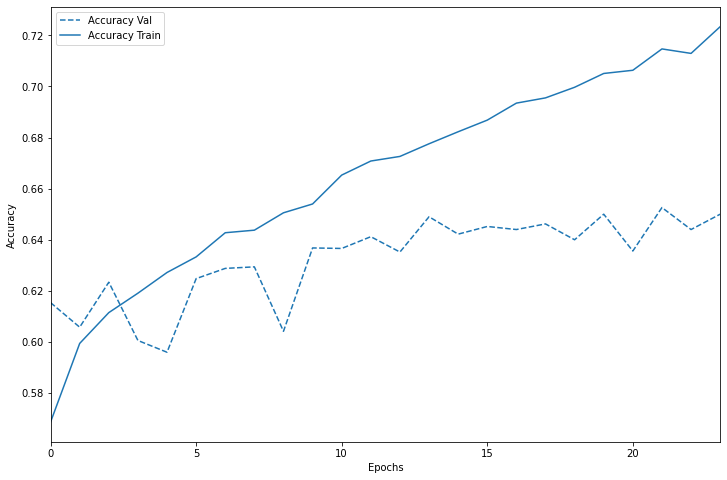

In [48]:
def plot_history(history, key='loss'):
    plt.figure(figsize=(12,8))

    val = plt.plot(history.epoch, history.history['val_'+key],'--', label=key.title() +' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=key.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history(history, key='accuracy')

<h1> Transfer Learning </h1>

<h2> Mobile Net </h2>

In [49]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False 

9412608/9406464 [==============================] - 2s 0us/step


In [50]:
mobile_model = tf.keras.Sequential([
                            mobile_net,
                            tf.keras.layers.GlobalAveragePooling2D(),
                            tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [51]:
mobile_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [81]:
mobile_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [82]:
history2 = mobile_model.fit(train_gen, 
                           validation_data= val_gen, 
                           epochs= 40,
                           steps_per_epoch= tf.math.ceil(len(train_set)/32).numpy(),
                           validation_steps= tf.math.ceil(len(val_set)/32).numpy(),
                           callbacks= callback
                          )

Epoch 1/40
625/625 [==============================] - 45s 71ms/step - loss: 0.0111 - accuracy: 0.9980 - val_loss: 0.0909 - val_accuracy: 0.9732
Epoch 2/40
625/625 [==============================] - 44s 71ms/step - loss: 0.0110 - accuracy: 0.9980 - val_loss: 0.0912 - val_accuracy: 0.9730
Epoch 3/40
625/625 [==============================] - 48s 77ms/step - loss: 0.0108 - accuracy: 0.9982 - val_loss: 0.0922 - val_accuracy: 0.9722
Epoch 4/40
625/625 [==============================] - 44s 70ms/step - loss: 0.0109 - accuracy: 0.9980 - val_loss: 0.0912 - val_accuracy: 0.9728
Epoch 5/40
625/625 [==============================] - 44s 70ms/step - loss: 0.0108 - accuracy: 0.9982 - val_loss: 0.0911 - val_accuracy: 0.9732
Epoch 6/40
625/625 [==============================] - 44s 71ms/step - loss: 0.0107 - accuracy: 0.9983 - val_loss: 0.0920 - val_accuracy: 0.9732
Epoch 7/40
625/625 [==============================] - 44s 70ms/step - loss: 0.0108 - accuracy: 0.9983 - val_loss: 0.0917 - val_accuracy:

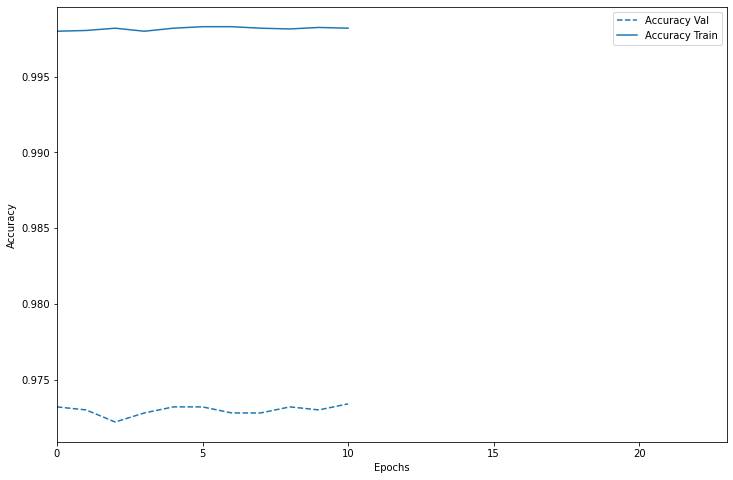

In [83]:
def plot_history(history, key='loss'):
    plt.figure(figsize=(12,8))

    val = plt.plot(history2.epoch, history2.history['val_'+key],'--', label=key.title() +' Val')
    plt.plot(history2.epoch, history2.history[key], color=val[0].get_color(), label=key.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history(history, key='accuracy')